In [40]:
import sys
sys.path.append(r"C:\pythonprojects\newtons_method\venv\Lib\site-packages")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

#for the consistent random values
np.random.seed(3)

[]

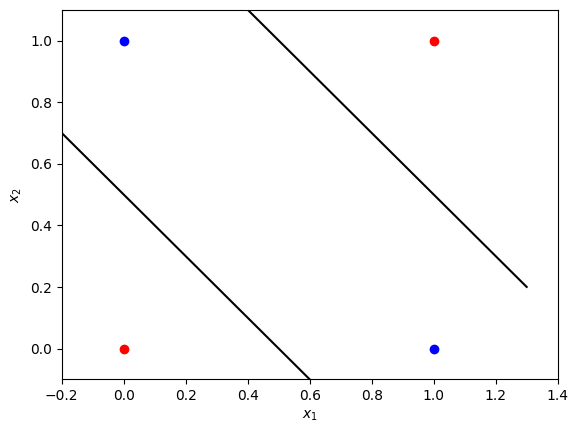

In [41]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# Example of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, -1 * x_line + 1.5, color="black")
ax.plot(x_line, -1 * x_line + 0.5, color="black")
plt.plot()

The shape of X is: (2, 2000)
The shape of Y is: (1, 2000)
I have m = 2000 training examples!


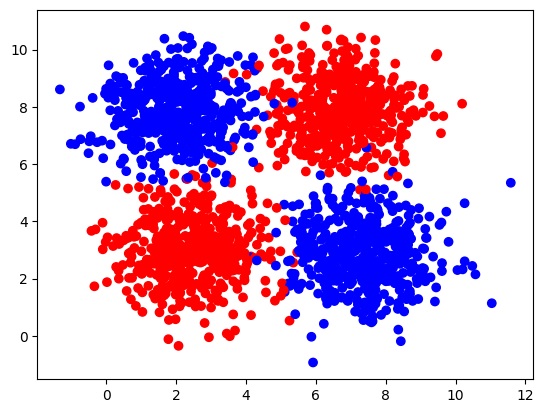

In [42]:
m = 2000
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (m))


In [43]:
#defining a sigmoid function
def sigmoid_function(z):
    res = 1 / (1 + np.exp(-z))
    return res
sigmoid_function(-2)    

np.float64(0.11920292202211755)

In [44]:
def layer_sizes(X, Y):
    # Size of input layer.
    n_x = X.shape[0] 
    # Size of hidden layer.
    n_h = 2
    # Size of hidden layer.
    n_y = Y.shape[0]  #size of the output layer
    return (n_x, n_h, n_y)
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))    
    

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


In [45]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01  #this is between the input and the hidden layer , initial weight
    b1 = np.zeros((n_h,1))  #same here
    W2 = np.random.randn(n_y,n_h) * 0.01  #this is between the hidden layer and the output layer , initial weight
    b2 = np.zeros((n_y,1))  #same here 
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))    

W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]


In [46]:
def forward_propagation(parameters,X):
    W1,b1,W2,b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = W1 @ X + b1  
    A1 = sigmoid_function(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid_function(Z2)
    assert(A2.shape == (n_y, X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2,cache
A2,cache = forward_propagation(parameters,X)
print(A2)
    

[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]


In [47]:
def compute_cost(A2, Y):
    # total number of features
    m = Y.shape[1]  
    #log loss for the classification problem
    logloss = -np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    cost = logloss / m
    assert(isinstance(cost, float))
    return cost
print("cost = " + str(compute_cost(A2, Y)))    

cost = 0.6931477703826822


In [48]:
def backward_propagation(cache,parameters,X,Y):
    A1 = cache['A1']
    A2 = cache['A2']
    W1,b1,W2,b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    m = X.shape[1]  #total number of samples
    dyz2 = A2 - Y
    dlw2 = 1/m * np.dot(dyz2,A1.T)
    dlb2 = 1/m * np.sum(dyz2,axis = 1,keepdims = True)
    dyz1 = (W2.T @ dyz2) * A1 * (1-A1)
    dlw1 = 1/m * dyz1 @ X.T
    dlb1 = 1/m * np.sum(dyz1,axis = 1,keepdims = True)
    return {
        'dlb1':dlb1,
        'dlw2':dlw2,
        'dlw1':dlw1,
        'dlb2':dlb2
    }
grads =  backward_propagation(cache,parameters,X,Y)   
    
    
    

In [49]:
def update_parameters(parameters,grads,learning_rate=1.2):
    W1,b1,W2,b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    dlb1=grads['dlb1']
    dlw2=grads['dlw2']
    dlw1=grads['dlw1']
    dlb2=grads['dlb2']
    #subtracting with the partial derivative
    W1 = W1 - learning_rate * dlw1
    b1 = b1 - learning_rate * dlb1
    W2 = W2 - learning_rate * dlw2
    b2 = b2 - learning_rate * dlb2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

    
    
    
    

W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]


In [50]:
#defining the datapipeline
def nn_model(X,Y,n_h,iterations,learning_rate,print_cost=False):
    n_x,n_y = layer_sizes(X,Y)[0],layer_sizes(X,Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    for i in range(iterations):
        A2,cache = forward_propagation(parameters,X)
        cost = compute_cost(A2,Y)
        grads = backward_propagation(cache,parameters,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate)
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
final_parameters = nn_model(X, Y, n_h=2,iterations=3000, learning_rate=1.2, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = final_parameters["W1"]
b1 = final_parameters["b1"]
W2 = final_parameters["W2"]
b2 = final_parameters["b2"]    
    
        
        
        
    
    

W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]


In [51]:
def predict(X,parameters):
    A2,cache = forward_propagation(parameters,X)  #with the right parameters 
    predictions = A2 > 0.5  #as this is the classification problem between 0 and 1 where 0.5 is the threshold
    return predictions
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, final_parameters)    
print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")
    
    
    

Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[ True  True False False]]


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 2')

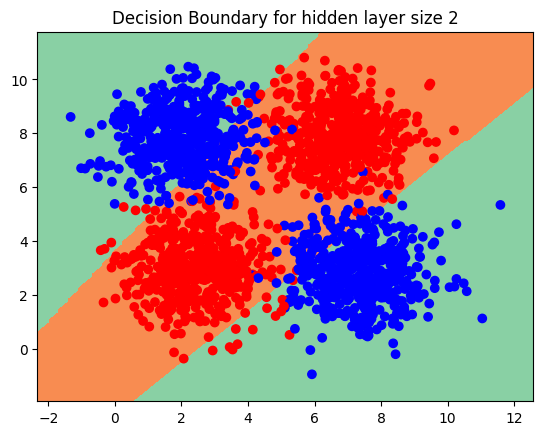

In [52]:
def plot_decision_boundary(predict, parameters, X, Y):
    # Define bounds of the domain.
    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1
    # Define the x and y scale.
    x1grid = np.arange(min1, max1, 0.1)  #x-cordinates
    x2grid = np.arange(min2, max2, 0.1)  #y-cordinated
    xx, yy = np.meshgrid(x1grid, x2grid)  #mixing of x_cordinates and y_cordinates
    r1, r2 = xx.flatten(), yy.flatten()   #flattening each grid to vector
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    # Vertical stack vectors to create x1,x2 input for the model.
    grid = np.vstack((r1,r2))  #then vertically stacking the pairs of x_cordinates and y_cordinates
    # Make predictions for the grid.
    predictions = predict(grid, parameters)
    # Reshape the predictions back into a grid.
    zz = predictions.reshape(xx.shape)
    # Plot the grid of x, y and z values as a surface.
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

# Plot the decision boundary.
plot_decision_boundary(predict, final_parameters, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))


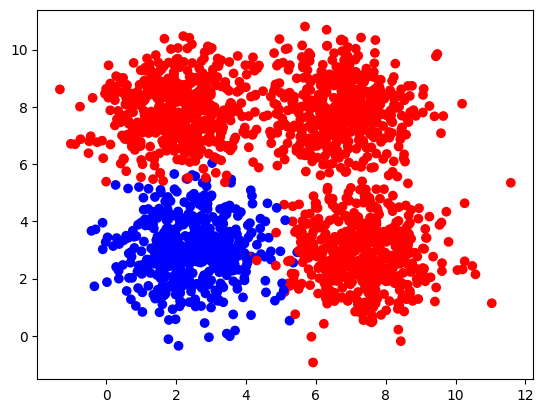

In [53]:
#for other datasets
n_samples = 2000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0)] = 0
labels[(labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 1
X_2 = np.transpose(samples)
Y_2 = labels.reshape((1,n_samples))

plt.scatter(X_2[0, :], X_2[1, :], c=Y_2, cmap=colors.ListedColormap(['blue', 'red']));

Text(0.5, 1.0, 'Decision Boundary')

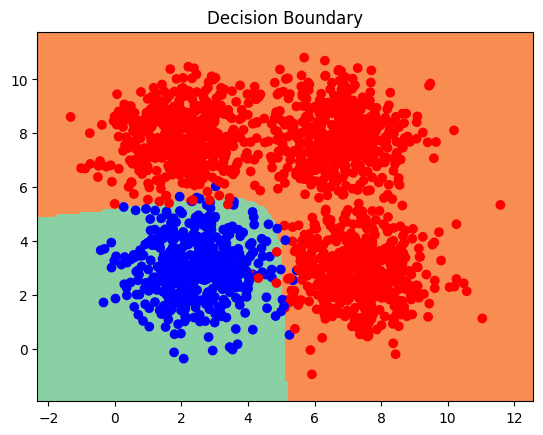

In [54]:
# parameters_2 = nn_model(X_2, Y_2, n_h=1, num_iterations=3000, learning_rate=1.2, print_cost=False)
parameters_2 = nn_model(X_2, Y_2, n_h=2,iterations=3000, learning_rate=1.2, print_cost=False)
# parameters_2 = nn_model(X_2, Y_2, n_h=15, num_iterations=3000, learning_rate=1.2, print_cost=False)

# This function will call predict function 
plot_decision_boundary(predict, parameters_2, X_2, Y_2)
plt.title("Decision Boundary")